In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

file = pd.read_excel("Formulário - Alunos (Responses).xlsx")

In [2]:
removed_columns = file.drop(columns=["Timestamp","Nome:"])

In [3]:
renamed_columns = removed_columns.rename(columns={"Idade:":"idade","Curso:":"curso",
                                                  "Quais redes sociais mais usa? (pode marcar mais de uma opção)":"redes_sociais",
                                                  "Quantos colaboradores operacionais do IDP você conhece pelo nome?":"n_colaboradores",
                                                  "Você tem alguma memória com esses colaboradores? Já interagiu com algum deles?":"memórias",
                                                  "Como você avalia o trabalho dos colaboradores de 1 a 5?":"avaliação"})

In [4]:
renamed_columns["redes_sociais"] = [i.replace(" ","") for i in renamed_columns["redes_sociais"]]

In [5]:
data = renamed_columns

data["redes_sociais"] = [i.split(",") for i in data["redes_sociais"]]

In [6]:
def socials(df):
    lista_redes = ["Twitter/X","Facebook","Instagram","TikTok","Discord",
                   "YouTube"]
    social = []
    for i in lista_redes:
        for e in df["redes_sociais"]:
            if i in e:
                social.append(i)
            else:
                pass
    new_df = pd.DataFrame({"redes_sociais":social})
    counts = new_df.value_counts()
    names = []
    numbers = []
    for i in range(0,len(counts)):
        names.append(counts.index[i][0])
        numbers.append(counts.values[i])
    final_df = pd.DataFrame({"rede":names,
                             "usuários":numbers})
    return final_df

In [7]:
new = socials(data)
new

,rede,usuários
0,Instagram,13
1,TikTok,11
2,YouTube,7
3,Twitter/X,4


In [8]:
new["%"] = [i/(len(data))*100 for i in new["usuários"]]
new

,rede,usuários,%
0,Instagram,13,100.000000
1,TikTok,11,84.615385
2,YouTube,7,53.846154
3,Twitter/X,4,30.769231


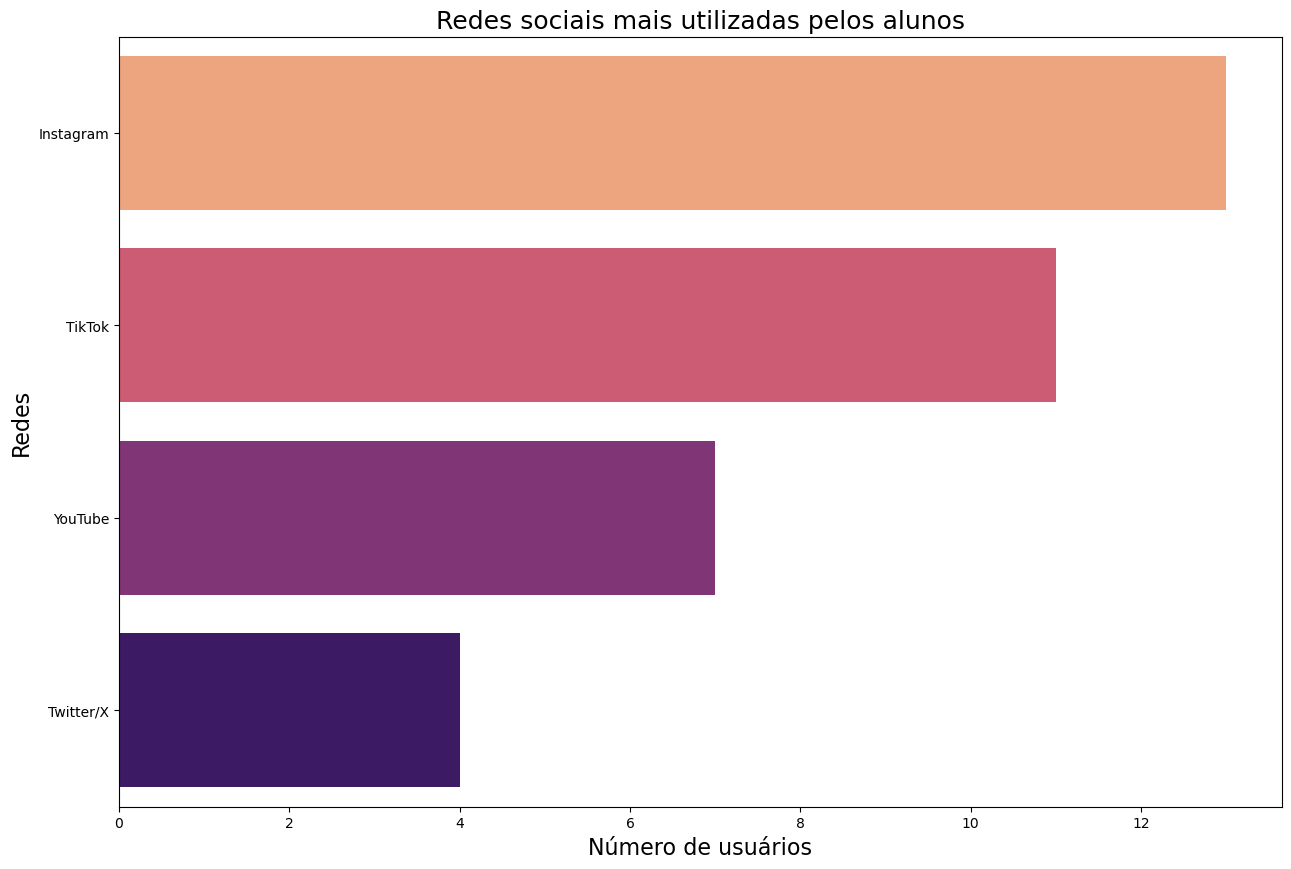

In [9]:
plt.figure(figsize=(15,10))
ax1 = sns.barplot(data=new,x="usuários",y="rede",palette="magma_r")
ax1.axes.set_title("Redes sociais mais utilizadas pelos alunos",
                   fontsize=18)
ax1.axes.set_xlabel("Número de usuários",fontsize=16)
ax1.axes.set_ylabel("Redes",fontsize=16)
plt.show()

In [10]:
colors = sns.color_palette("magma")

curso_count = data["curso"].value_counts()
curso_count

Economia                    10
Publicidade e Propaganda     2
Administração                1
Name: curso, dtype: int64

([<matplotlib.patches.Wedge at 0x171bc4607f0>,
 [Text(-0.8233618545088073, 0.7294348884854754, 'Economia'),
  Text(0.6248713159427525, -0.905282187227813, 'Publicidade e Propaganda'),
  Text(1.0680360337692223, -0.2632470903362633, 'Administração')],
 [Text(-0.44910646609571303, 0.397873575537532, '76.92%'),
  Text(0.34083889960513764, -0.4937902839424434, '15.38%'),
  Text(0.5825651093286667, -0.14358932200159816, '7.69%')])

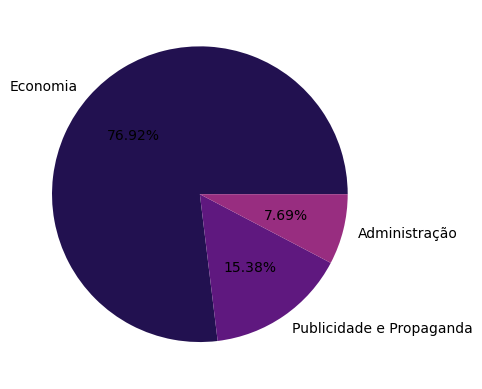

In [11]:
plt.pie(curso_count, labels=curso_count.index, colors=colors, autopct="%1.2f%%")

In [12]:
colab_count = data["n_colaboradores"].value_counts()
colab_count

De 1 a 3    11
De 3 a 5     2
Name: n_colaboradores, dtype: int64

([<matplotlib.patches.Wedge at 0x171bc4cc250>,
 [Text(-0.9740016429451693, 0.5111954611888794, 'De 1 a 3'),
  Text(0.9740016668759548, -0.5111954155925714, 'De 3 a 5')],
 [Text(-0.5312736234246378, 0.2788338879212069, '84.62%'),
  Text(0.5312736364777935, -0.27883386305049346, '15.38%')])

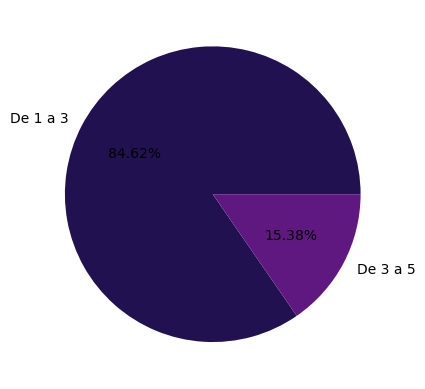

In [13]:
plt.pie(colab_count, labels=colab_count.index, colors=colors, autopct="%1.2f%%")

In [14]:
data.describe()

,idade,avaliação
count,13.000000,13.000000
mean,19.615385,4.923077
std,1.980676,0.277350
min,18.000000,4.000000
25%,18.000000,5.000000
50%,19.000000,5.000000
75%,20.000000,5.000000
max,24.000000,5.000000


<Axes: >

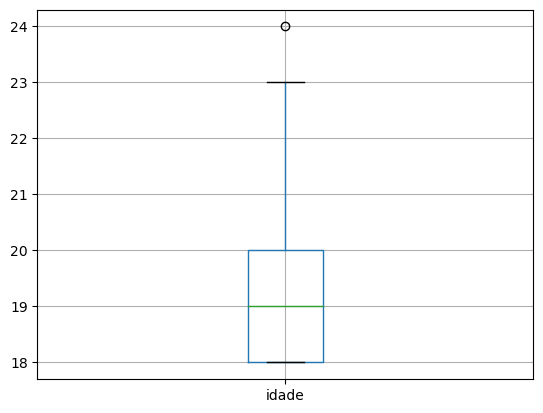

In [15]:
why_is_this_a_pd_series_object = data["idade"].to_frame()
why_is_this_a_pd_series_object.boxplot()